# Simple Regression with Scikit-Learn & ONNX (Diabetes Dataset)

This example illustrates how to train regression models from Scikit-learn and use them interactively in a Marcelle application. We use scikit-learn's [diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset).

The dataset contains ten baseline variables: age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

In [15]:
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

Load the dataset and split it between a training set and a test set

In [16]:
diabetes = load_diabetes(as_frame=True)
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
329,-0.012780,0.050680,-0.055785,-0.002228,-0.027712,-0.029184,0.019187,-0.039493,-0.017052,0.044485
261,0.048974,-0.044642,-0.041774,0.104501,0.035582,-0.025739,0.177497,-0.076395,-0.012908,0.015491
111,0.019913,-0.044642,0.004572,-0.026328,0.023198,0.010273,0.067048,-0.039493,-0.023645,-0.046641
271,0.038076,0.050680,0.008883,0.042530,-0.042848,-0.021042,-0.039719,-0.002592,-0.018118,0.007207
17,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027368,-0.001078


## Train a linear regression model

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Regression Score (LinearRegression):", model.score(X_test, y_test))

Regression Score (LinearRegression): 0.4271568714091656


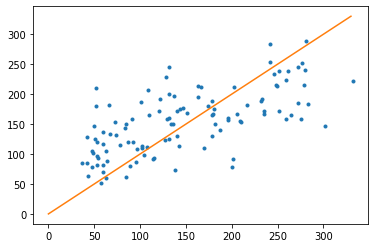

In [19]:
# plot prediction and actual data
y_pred = model.predict(X_test)
plt.plot(y_test, y_pred, ".")

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

## train a Random Forest Regressor

In [20]:
model2 = RandomForestRegressor()
model2.fit(X_train, y_train)
print("Regression Score (RandomForest):", model2.score(X_test, y_test))

Regression Score (RandomForest): 0.41867706432270924


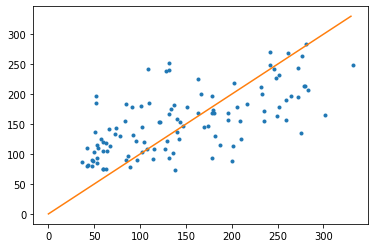

In [21]:
# plot prediction and actual data
y_pred = model2.predict(X_test)
plt.plot(y_test, y_pred, ".")

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

## Export Data and Models to Marcelle

First, we write the data as CSV for the Marcelle Interface

In [22]:
train_set = pd.concat([X_train, y_train], axis=1)
train_set.to_csv("diabetes_train_set.csv")
test_set = pd.concat([X_test, y_test], axis=1)
test_set.to_csv("diabetes_test_set.csv")

Then, we convert the model to ONNX

In [25]:
initial_type = [("input", FloatTensorType([1, 10]))]
onx_model = convert_sklearn(
    model,
    initial_types=initial_type,
    target_opset=12,
)
with open("../public/diabetes_linear_model.onnx", "wb") as f:
    f.write(onx_model.SerializeToString())

In [26]:
initial_type = [("input", FloatTensorType([1, 10]))]
onx_model2 = convert_sklearn(
    model2,
    initial_types=initial_type,
    target_opset=12,
)
with open("../public/diabetes_random_forest.onnx", "wb") as f:
    f.write(onx_model2.SerializeToString())